In [2]:
if __name__ == '__main__':
    import sys
    import os
    from pathlib import Path
    curr_file_path = Path(os.path.abspath(''))
    sys.path.append(str(curr_file_path.parent))

import numpy as np
import glob2 as glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from aux_funcs import format_plot

AVERAGING_SIZE = 20

plt.rcParams['font.family'] = 'Helvetica Light'

color_high_reward = '#d95f02'
color_low_reward = '#1b9e77'
color_unrewarded = '#7570b3'
color_intersite = '#808080'
color_interpatch = '#b3b3b3'

odor_colors = [
    color_unrewarded,
    color_low_reward,
    color_high_reward,
]

In [3]:
def load_data(data_path, averaging_size=AVERAGING_SIZE):
    file_names = glob.glob(data_path)
    data = []
    for file_name in file_names:
        data_for_file = np.load(file_name)
        data.append(data_for_file)
    data = np.concatenate(data, axis=1)
    reduced_data = np.empty((data.shape[0], int(data.shape[1] / averaging_size)))
    for k in range(0, int(data.shape[1] / averaging_size) * averaging_size, averaging_size):
        reduced_data[:, int(k / averaging_size)] = data[:, k:k + averaging_size].mean(axis=1)
    return reduced_data
    

Axes(0.125,0.11;0.775x0.77)


C:\Users\david.bell\AppData\Local\Temp\ipykernel_29408\1034648714.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axs.scatter(s, pr_disc, c=cmap(reward_param / 50))


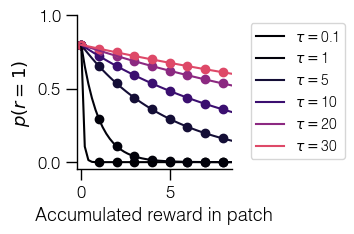

In [17]:
scale = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['magma']

s = np.arange(0, 20)
x = np.linspace(0, 20, 100)
a = 0.8

for i, reward_param in enumerate([0.1, 1, 5, 10, 20, 30]):
    pr_disc = a * np.exp(-s/reward_param)
    pr_cont = a * np.exp(-x/reward_param)
    axs.plot(x, pr_cont, label=r'$\tau = $' + f'{reward_param}', c=cmap(reward_param / 50))
    axs.scatter(s, pr_disc, c=cmap(reward_param / 50))

axs.set_ylabel(r'$p(r=1)$', fontsize=13)
axs.set_xlabel('Accumulated reward in patch')
axs.set_xlim(-0.25, 8.5)
axs.set_ylim(-0.05, 1)
format_plot(axs)
fig.legend(bbox_to_anchor=(1.5, 0.875))



Axes(0.125,0.11;0.775x0.77)


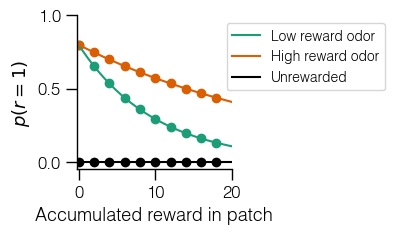

In [18]:
scale = 0.5
fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 4 * scale))

cmap = mpl.colormaps['magma']

s = np.arange(0, 20, 2)
x = np.linspace(0, 20, 100)
a = 0.8

labels = [
    'Low reward odor',
    'High reward odor',
]

for i, reward_param in enumerate([10, 30]):
    pr_disc = a * np.exp(-s/reward_param)
    pr_cont = a * np.exp(-x/reward_param)
    axs.plot(x, pr_cont, label=labels[i], c=odor_colors[1:][i])
    axs.scatter(s, pr_disc, c=odor_colors[1:][i])

axs.plot(x, [0] * len(x), c='black', label='Unrewarded')
axs.scatter(s, [0] * len(s), c='black')

axs.set_ylabel(r'$p(r=1)$', fontsize=13)
axs.set_xlabel('Accumulated reward in patch')
axs.set_xlim(-0.25, 20)
axs.set_ylim(-0.05, 1)
format_plot(axs)
fig.legend(bbox_to_anchor=(1.7, 0.875))


0.0844046666666667
1


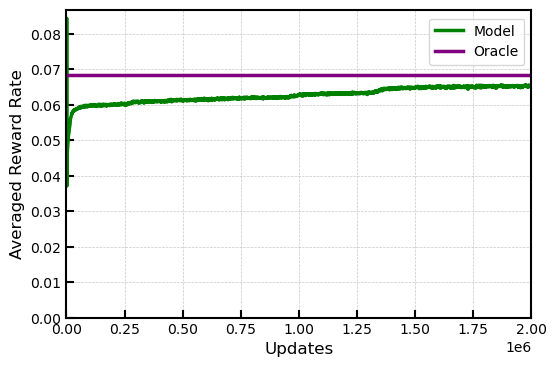

In [26]:
data_dir = '../../results/rl_agent_outputs/structural_priors_in_rl_low_noise_optim_01_2024-12-04_22_52_55_172250_var_noise_0.0001_activity_weight_1.0/reward_rates'
averaging_size = 1000
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

# Plot shaded region for standard error
axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

# Plot mean line
axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Model',
)

# Plot mean line
axs.plot(
    [0, 2e6],
    0.0685 * np.ones(2),
    c='purple',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Oracle',
)

# Adjust axes limits
axs.set_xlim(0, 2e6)
axs.set_ylim(0)
# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.875), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

0.10113666666666668
19


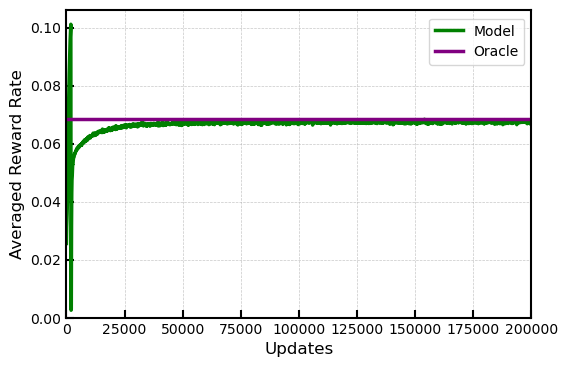

In [29]:
data_dir = '../../results/rl_agent_outputs/structural_priors_in_rl_fixed_curr_optim_02_2024-12-04_22_56_50_041229_var_noise_0.0001_activity_weight_1.0/reward_rates'
averaging_size = 100
reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)

scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

# Plot shaded region for standard error
axs.fill_between(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
    color='green',
    alpha=0.2,
    zorder=1,
)

# Plot mean line
axs.plot(
    np.arange(reduced_data.shape[1]) * averaging_size,
    np.mean(reduced_data.T, axis=1),
    c='green',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Model',
)

axs.plot(
    [0, 0.2e6],
    0.0685 * np.ones(2),
    c='purple',
    linewidth=2.5,  # Thicker plot line
    zorder=2,
    label='Oracle',
)

# Adjust axes limits
axs.set_xlim(0, 0.2e6)
axs.set_ylim(0)

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.875), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())


0.11418166666666667
19


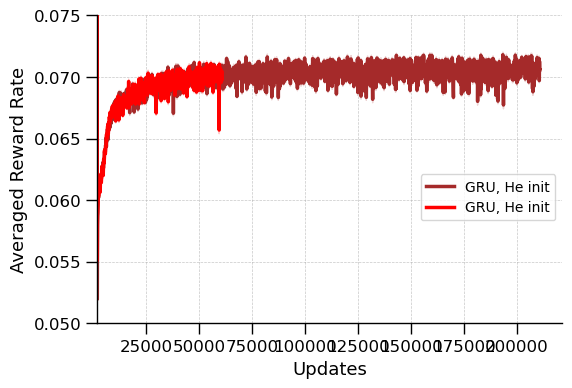

In [14]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_56_19_657542_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_59_24_627895_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_init_2025-02-10_16_20_20_667514_var_noise_0.0001_activity_weight_1/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_input_2025-02-12_18_45_39_223955_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_inp_2025-02-13_11_37_58_288427_var_noise_0.0001_activity_weight_1/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_13_44_01_882447_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_17_07_03_475277_var_noise_0.0001_activity_weight_1.0/reward_rates',
]

colors = [
    'brown',
    'red',
    'green',
    'blue',
    'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    'GRU, Line init',
    'GRU, Line init plus\naligned inputs',
    'GRU, Line init plus\naligned inputs and update',
    'ReLU',
    'ReLU, Line init',
    
]

for i, data_dir in enumerate(data_dirs):
    averaging_size = 100
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
axs.set_xlim(2000)
axs.set_ylim(0.05, 0.075)
# axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# axs.set_xticks([50000, 1000000, 150000, 200000])

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

format_plot(axs)

0.09976766666666667
1


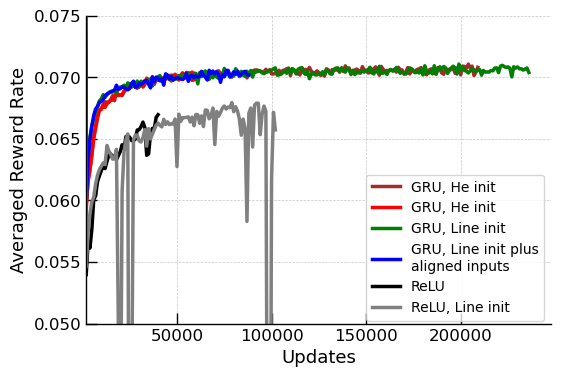

In [8]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_56_19_657542_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_59_24_627895_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_init_2025-02-10_16_20_20_667514_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_input_2025-02-12_18_45_39_223955_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/fixed_odor_acc_reward_line_plus_inp_2025-02-13_11_37_58_288427_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_13_44_01_882447_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_relu_2025-02-13_17_07_03_475277_var_noise_0.0001_activity_weight_1.0/reward_rates',
]

colors = [
    'brown',
    'red',
    'green',
    'blue',
    # 'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    'GRU, Line init',
    'GRU, Line init plus\naligned inputs',
    # 'GRU, Line init plus\naligned inputs and update',
    'ReLU',
    'ReLU, Line init',
    
]

for i, data_dir in enumerate(data_dirs):
    averaging_size = 1000
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
axs.set_xlim(2000)
axs.set_ylim(0.05, 0.075)
# axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

format_plot(axs)

Axes(0.125,0.11;0.775x0.77)
0.08633208333333332
0


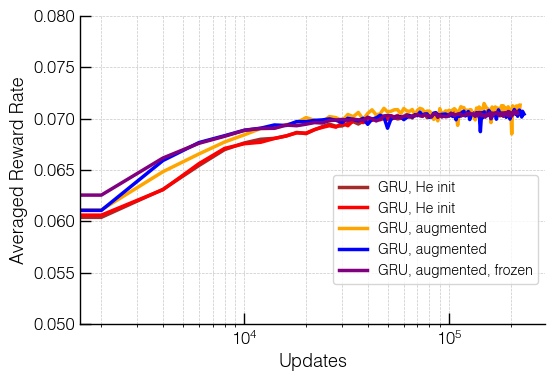

In [8]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_56_19_657542_var_noise_0.0001_activity_weight_1.0/reward_rates',
    '../../results/rl_agent_outputs/fixed_odor_acc_reward_2025-02-09_18_59_24_627895_var_noise_0.0001_activity_weight_1.0/reward_rates',
    # '../../results/rl_agent_outputs/train_augmented_rnn_2025-02-20_23_56_07_115905_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_pretrained_2025-02-21_00_09_16_185395_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_pretrained_2025-02-23_09_57_40_223726_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/train_augmented_rnn_pretrained_frozen_2025-02-23_22_17_18_355590_var_noise_0.0001_activity_weight_1/reward_rates'
]

colors = [
    'brown',
    'red',
    'orange',
    'blue',
    'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    # 'GRU, augmented ctrl',
    'GRU, augmented',
    'GRU, augmented',
    'GRU, augmented, frozen',
]

# baseline = '../../results/rl_agent_outputs/grid_search_test_2025-01-12_08_01_22_051999_var_noise_0_activity_weight_0/reward_rates'
# reduced_data = load_data(os.path.join(baseline, '*.npy'), averaging_size=1)

# # Plot mean line
# axs.plot(
#     np.arange(reduced_data.shape[1]) * 1,
#     np.mean(reduced_data.T, axis=1),
#     c=colors[i],
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Optimal',
# )


for i, data_dir in enumerate(data_dirs):
    averaging_size = 2000
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
# axs.set_xlim(0)
axs.set_ylim(0.05, 0.08)
axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)
format_plot(axs)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())

Axes(0.125,0.11;0.775x0.77)
0.10670333333333334
3


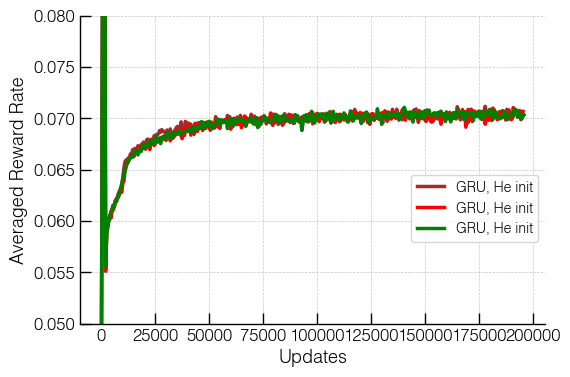

In [7]:
scale = 1
fig, axs = plt.subplots(1, 1, figsize=(6 * scale, 4 * scale))

data_dirs = [
    '../../results/rl_agent_outputs/he_init_with_noise_std_all_0p1_2025-04-19_23_17_25_922161_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/he_init_with_noise_std_all_0p1_2025-04-19_23_17_48_004298_var_noise_0.0001_activity_weight_1/reward_rates',
    '../../results/rl_agent_outputs/he_init_with_noise_std_all_0p1_2025-04-19_23_18_00_691765_var_noise_0.0001_activity_weight_1/reward_rates',
]

colors = [
    'brown',
    'red',
    'green',
    'blue',
    'purple',
    'black',
    'grey',
]

labels = [
    'GRU, He init',
    'GRU, He init',
    'GRU, He init',
    'GRU, augmented ctrl',
    'GRU, augmented',
    'GRU, augmented',
    'GRU, augmented, frozen',
]

# baseline = '../../results/rl_agent_outputs/grid_search_test_2025-01-12_08_01_22_051999_var_noise_0_activity_weight_0/reward_rates'
# reduced_data = load_data(os.path.join(baseline, '*.npy'), averaging_size=1)

# # Plot mean line
# axs.plot(
#     np.arange(reduced_data.shape[1]) * 1,
#     np.mean(reduced_data.T, axis=1),
#     c=colors[i],
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Optimal',
# )


for i, data_dir in enumerate(data_dirs):
    averaging_size = 500
    reduced_data = load_data(os.path.join(data_dir, '*.npy'), averaging_size=averaging_size)
    
    # Plot shaded region for standard error
    axs.fill_between(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1) - np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        np.mean(reduced_data.T, axis=1) + np.std(reduced_data.T, axis=1) / np.sqrt(reduced_data.shape[0]),
        color=colors[i],
        alpha=0.2,
        zorder=1,
    )
    
    # Plot mean line
    axs.plot(
        np.arange(reduced_data.shape[1]) * averaging_size,
        np.mean(reduced_data.T, axis=1),
        c=colors[i],
        linewidth=2.5,  # Thicker plot line
        zorder=2,
        label=labels[i],
    )

# axs.plot(
#     [0, 0.2e6],
#     0.0725 * np.ones(2),
#     c='purple',
#     linewidth=2.5,  # Thicker plot line
#     zorder=2,
#     label='Oracle',
# )

# Adjust axes limits
# axs.set_xlim(0)
axs.set_ylim(0.05, 0.08)
# axs.set_xscale('log')

# Add labels and titles
axs.set_ylabel('Averaged Reward Rate', fontsize=12)
axs.set_xlabel('Updates', fontsize=12)

# Customize tick parameters
axs.tick_params(axis='both', direction='in', length=6, width=1.5, labelsize=10)

# Thicken the axes lines
axs.spines['top'].set_linewidth(1.5)
axs.spines['right'].set_linewidth(1.5)
axs.spines['bottom'].set_linewidth(1.5)
axs.spines['left'].set_linewidth(1.5)

# Add grid for better readability
axs.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
fig.legend(bbox_to_anchor=(0.9, 0.5), fontsize=10)
format_plot(axs)

# Print stats
print(np.mean(reduced_data.T, axis=1).max())
print(np.mean(reduced_data.T, axis=1).argmax())